In [1]:
import sys
sys.path.append('../scripts/')
from utility import read_file, create_folder, temp_record_query, temp_record_sdf

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = (
    # Create a spark session (which will run spark jobs)
    SparkSession.builder.appName("Project 2")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config('spark.executor.memory','10g')
    .config('spark.driver.memory','12g')
    .config('spark.driver.maxResultsSize', '10 GiB')
    .config('spark.shuffle.file.buffer', '64k')
    # .config("spark.network.timeout", "3600s")
    # .master("local[6]")
    .getOrCreate()
    )

22/09/06 23:47:04 WARN Utils: Your hostname, DESKTOP-RKUV3OS resolves to a loopback address: 127.0.1.1; using 172.26.115.71 instead (on interface eth0)
22/09/06 23:47:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/09/06 23:47:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
print("================ Connect Table ================")
conn = read_file(spark, 'consumer_user_details.parquet')

print("================ Consumer ================")
sdf = read_file(spark, 'tbl_consumer.csv', type='csv', sep='|')

================ Connect Table ================
|> Loading File...
|> Loading Finished!
-RECORD 0--------------
 user_id     | 1       
 consumer_id | 1195503 
only showing top 1 row

================ Consumer ================
|> Loading File...
|> Loading Finished!
-RECORD 0---------------------------------
 name        | Yolanda Williams           
 address     | 413 Haney Gardens Apt. 742 
 state       | WA                         
 postcode    | 6935                       
 gender      | Female                     
 consumer_id | 1195503                    
only showing top 1 row



In [5]:
conn

+-------+-----------+
|user_id|consumer_id|
+-------+-----------+
|      1|    1195503|
|      2|     179208|
|      3|    1194530|
|      4|     154128|
|      5|     712975|
|      6|     407340|
|      7|     511685|
|      8|     448088|
|      9|     650435|
|     10|    1058499|
|     11|     428325|
|     12|    1494640|
|     13|    1146717|
|     14|    1343547|
|     15|    1463076|
|     16|    1356405|
|     17|    1331093|
|     18|      80965|
|     19|    1226530|
|     20|    1390367|
+-------+-----------+
only showing top 20 rows

- First, balabala

In [6]:
sdf 

+-----------------+--------------------+-----+--------+-----------+-----------+
|             name|             address|state|postcode|     gender|consumer_id|
+-----------------+--------------------+-----+--------+-----------+-----------+
| Yolanda Williams|413 Haney Gardens...|   WA|    6935|     Female|    1195503|
|       Mary Smith|     3764 Amber Oval|  NSW|    2782|     Female|     179208|
|    Jill Jones MD|  40693 Henry Greens|   NT|     862|     Female|    1194530|
|  Lindsay Jimenez|00653 Davenport C...|  NSW|    2780|     Female|     154128|
|Rebecca Blanchard|9271 Michael Mano...|   WA|    6355|     Female|     712975|
|    Karen Chapman|2706 Stewart Oval...|  NSW|    2033|     Female|     407340|
|     Andrea Jones|   122 Brandon Cliff|  QLD|    4606|     Female|     511685|
| Stephen Williams|6804 Wright Crest...|   WA|    6056|       Male|     448088|
|  Stephanie Reyes|5813 Denise Land ...|  NSW|    2482|     Female|     650435|
| Jillian Gonzales|461 Ryan Common S...|  VIC|    3220|     Female|    1058499|
|     Eugene Lucas|33983 Kevin Drive...|  VIC|    3063|Undisclosed|     428325|
|    Melissa Jones| 13706 Kimberly Port|   WA|    6743|     Female|    1494640|
| Angela Brown PhD|0236 Mills Land S...|  QLD|    4673|     Female|    1146717|
|     Lance Butler|   8943 Kenneth Camp|  VIC|    3332|       Male|    1343547|
|      Paul Abbott|     60495 Ryan Hill|  QLD|    4512|       Male|    1463076|
|       Tracy Hart|9671 Jacob Harbor...|  NSW|    2452|       Male|    1356405|
|    Alyssa Wilson|  44353 Nathan Ridge|  VIC|    3719|     Female|    1331093|
|  Michael Burnett|   89400 Torres Fort|  NSW|    1109|       Male|      80965|
|Victoria Gonzalez|68657 Johnson Gle...|  TAS|    7276|     Female|    1226530|
|     James Norris|   790 Ramos Landing|  VIC|    3234|Undisclosed|    1390367|
+-----------------+--------------------+-----+--------+-----------+-----------+
only showing top 20 rows

In [7]:
import pyspark.sql.functions as f
from functools import reduce
sdf.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in sdf.columns))).show()

+----+-------+-----+--------+------+-----------+
|name|address|state|postcode|gender|consumer_id|
+----+-------+-----+--------+------+-----------+
+----+-------+-----+--------+------+-----------+



In [8]:
print(sdf.toPandas().isnull().sum())

name           0
address        0
state          0
postcode       0
gender         0
consumer_id    0
dtype: int64


In [9]:
sdf

DataFrame[name: string, address: string, state: string, postcode: string, gender: string, consumer_id: string]

In [10]:
df=sdf.groupby('state').count()
df = df.toPandas()
df

state   count
0    NT    7764
1   ACT    4664
2    SA   54973
3   TAS   18878
4    WA   79146
5   QLD   72861
6   VIC  117525
7   NSW  144188

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
df = sdf.toPandas()
countdf = df.groupby('state').count()
info_dic = {}
provinces = countdf.index.values.tolist()
print(provinces)
for i in range(len(provinces)):
    provinces[i] = 'AU-'+provinces[i]
    print(provinces[i])
nums = countdf['address'].tolist() 
colors = ['darkred', 'firebrick', 'indianred', 'lightcoral', 'lightsalmon']
for i in range(len(provinces)):
    info_dic[provinces[i]] = {'num': nums[i]}

for name in info_dic.keys():
    if info_dic[name]['num'] >= 1000000:
        info_dic[name]['color'] = 'darkred'
    elif 60000 < info_dic[name]['num'] < 999999:
        info_dic[name]['color'] = 'firebrick'
    elif 10000 < info_dic[name]['num'] < 59999:
        info_dic[name]['color'] = 'indianred'
    elif 4999 < info_dic[name]['num'] < 9999:
        info_dic[name]['color'] = 'lightcoral'
    else:
        info_dic[name]['color'] = 'lightsalmon'


['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']
AU-ACT
AU-NSW
AU-NT
AU-QLD
AU-SA
AU-TAS
AU-VIC
AU-WA


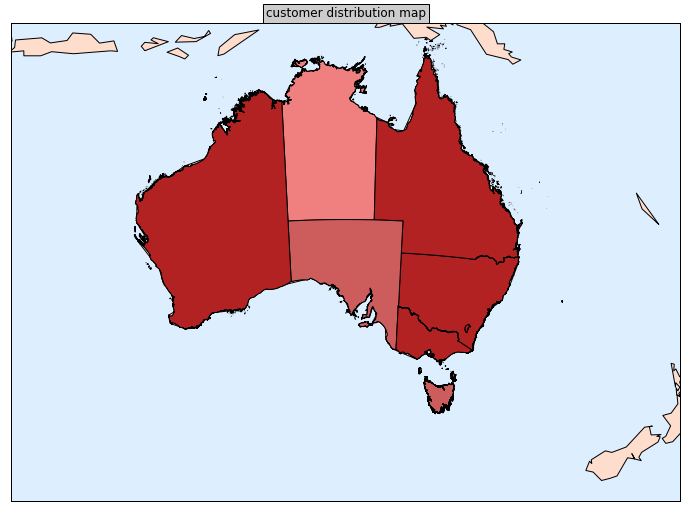

In [28]:
map1 = Basemap(projection='lcc', width=7000000, height=5000000,
               lat_0=-30, lon_0=135)
plt.figure(figsize=(12, 9))
map1.drawmapboundary(fill_color='#DDEEFF')
map1.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
map1.drawcoastlines()
map1.readshapefile('../map/gadm41_AUS_0', 'prov')
map1.readshapefile('../map/gadm41_AUS_1', 'prov')
ax = plt.gca()
for name in provinces:
    patch = []
    for info, shape in zip(map1.prov_info, map1.prov):
        if name in info['ISO_1']:
            patch.append(Polygon(np.array(shape), closed=True))
    ax.add_collection(
        PatchCollection(patch, facecolor=info_dic[name]['color'], edgecolor='k', linewidths=1., zorder=2))
plt.title('customer distribution map', bbox={'facecolor':'0.8', 'pad':3})

plt.show()

In [15]:
map1.prov

[[(2203136.3600971038, 4407086.4972754),
  (2203131.0229477296, 4407053.242303231),
  (2203116.340553231, 4407051.771021082),
  (2203106.2971372837, 4407056.373542329),
  (2203075.0662463726, 4407072.058300139),
  (2203041.6033126484, 4407077.001727467),
  (2202986.455977274, 4407079.771933719),
  (2202961.4963534186, 4407077.270515145),
  (2202939.844437725, 4407066.8037218945),
  (2202908.726969146, 4407047.207904244),
  (2202858.9468971347, 4407066.992641895),
  (2202827.0661886986, 4407062.979383288),
  (2202810.769985778, 4407069.642843435),
  (2202790.4392569866, 4407107.454098285),
  (2202786.4384554992, 4407147.36928718),
  (2202798.011990263, 4407188.962685466),
  (2202849.5553899817, 4407203.944781475),
  (2202889.2209064276, 4407207.686567132),
  (2202910.051850414, 4407234.31474325),
  (2202949.694042738, 4407238.287714942),
  (2203023.6209005164, 4407221.155987327),
  (2203071.0330379363, 4407226.140961412),
  (2203068.125013583, 4407263.127710633),
  (2203103.128039983, 4

In [16]:
map1.prov_info

[{'GID_1': 'AUS.1_1',
  'GID_0': 'AUS',
  'COUNTRY': 'Australia',
  'NAME_1': 'Ashmore and Cartier Islands',
  'VARNAME_1': 'NA',
  'NL_NAME_1': 'NA',
  'TYPE_1': 'Territory',
  'ENGTYPE_1': 'Territory',
  'CC_1': '12',
  'HASC_1': 'AU.AS',
  'ISO_1': 'NA',
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'GID_1': 'AUS.1_1',
  'GID_0': 'AUS',
  'COUNTRY': 'Australia',
  'NAME_1': 'Ashmore and Cartier Islands',
  'VARNAME_1': 'NA',
  'NL_NAME_1': 'NA',
  'TYPE_1': 'Territory',
  'ENGTYPE_1': 'Territory',
  'CC_1': '12',
  'HASC_1': 'AU.AS',
  'ISO_1': 'NA',
  'RINGNUM': 2,
  'SHAPENUM': 1},
 {'GID_1': 'AUS.1_1',
  'GID_0': 'AUS',
  'COUNTRY': 'Australia',
  'NAME_1': 'Ashmore and Cartier Islands',
  'VARNAME_1': 'NA',
  'NL_NAME_1': 'NA',
  'TYPE_1': 'Territory',
  'ENGTYPE_1': 'Territory',
  'CC_1': '12',
  'HASC_1': 'AU.AS',
  'ISO_1': 'NA',
  'RINGNUM': 3,
  'SHAPENUM': 1},
 {'GID_1': 'AUS.1_1',
  'GID_0': 'AUS',
  'COUNTRY': 'Australia',
  'NAME_1': 'Ashmore and Cartier Islands',
  'VARNAME_1': 